In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris, make_classification
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
import numpy as np
from matplotlib import pyplot as plt

# Decision Tree and Random Forest Classifiers

1. Why are tree based methods sometimes preferable?
2. How are decision trees constructed?
3. How do random forests improve on decision trees?
4. Choosing random forest parameters

### 1. Why are tree based methods sometimes preferable?

When relationships between predictors and response variables are nonlinear, linear methods like logistic regression are unable to produce good classifications without feature engineering. 

Text(0.5, 0.98, 'Logistic Regression')

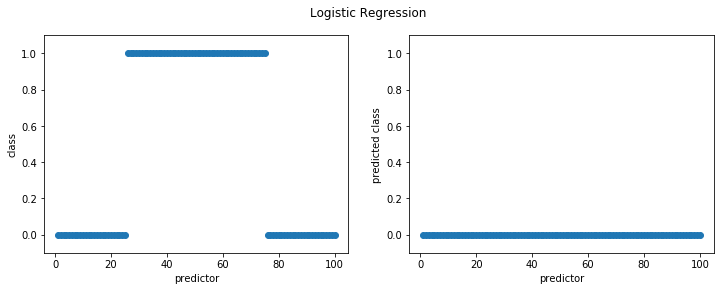

In [45]:
classes = np.zeros(100)
classes[25:75] = 1
predictor = np.arange(1, 101)

log_reg = LogisticRegression()
log_reg.fit(predictor.reshape(-1, 1), classes)


fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].scatter(predictor, classes)
ax[0].set_xlabel('predictor')
ax[0].set_ylabel('class')
ax[0].set_ylim(-0.1,1.1)

ax[1].scatter(predictor, log_reg.predict(predictor.reshape(-1, 1)))
ax[1].set_xlabel('predictor')
ax[1].set_ylabel('predicted class')
ax[1].set_ylim(-0.1,1.1)

fig.suptitle('Logistic Regression')

Text(0.5, 0.98, 'Logistic Regression with Feature Engineering')

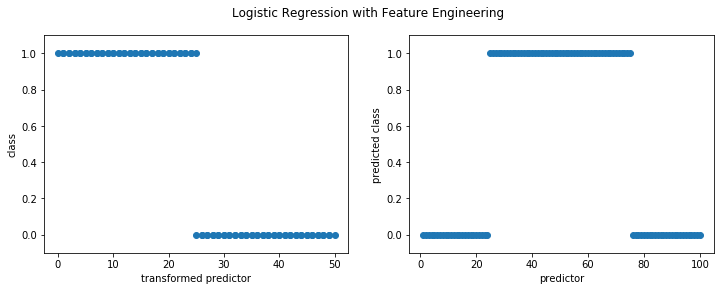

In [46]:
transformed_predictor = np.abs(predictor-50)

log_reg_transformed = LogisticRegression()
log_reg_transformed.fit(transformed_predictor.reshape(-1, 1), classes)

fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].scatter(transformed_predictor, classes)
ax[0].set_xlabel('transformed predictor')
ax[0].set_ylabel('class')
ax[0].set_ylim(-0.1,1.1)

ax[1].scatter(predictor, log_reg_transformed.predict(transformed_predictor.reshape(-1, 1)))
ax[1].set_xlabel('predictor')
ax[1].set_ylabel('predicted class')
ax[1].set_ylim(-0.1,1.1)

fig.suptitle('Logistic Regression with Feature Engineering')

Text(0.5, 0.98, 'Decision Tree Classifier')

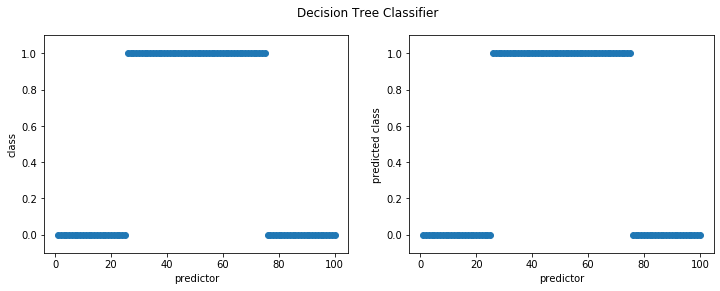

In [47]:
tree = DecisionTreeClassifier()
tree.fit(predictor.reshape(-1, 1), classes)

fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].scatter(predictor, classes)
ax[0].set_xlabel('predictor')
ax[0].set_ylabel('class')
ax[0].set_ylim(-0.1,1.1)

ax[1].scatter(predictor, tree.predict(predictor.reshape(-1, 1)))
ax[1].set_xlabel('predictor')
ax[1].set_ylabel('predicted class')
ax[1].set_ylim(-0.1,1.1)

fig.suptitle('Decision Tree Classifier')

### 2. How are decision trees constructed?

Decision trees work like a flowchart. In the above example, we might have...

<img src="decision_tree.png" width=400>

The decision points are chosen based on minimizing **Gini Impurity**.

**Gini Impurity** is calculated as the sum of squares of the probability an observation belongs to each class.

$$ G = \sum_{c}p_c (1-p_c)$$

For example if in a group we have 3 members of class 0 and 2 of class 1, then 

$$ G = 0.6 \times 0.4 + 0.4 \times 0.6 = 2(0.6 \times 0.4) = 0.48$$

This is the Gini impurity for a group... but we want to find the Gini impurity for a split!

For a split, we want to use a weighted combination based on the number of samples on each side of the split. So if we have a left side with 5 samples, 3 in class 0 and 2 in class 1, and a right side with 15 samples, all of which are in class 0...

$$ G = 2(0.6 \times 0.4)  \frac{5}{20} + 2(1.0 \times 0.0) \frac{15}{20} = 0.12$$

(-0.1, 1.1)

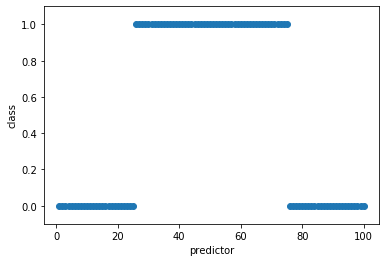

In [48]:
fig, ax = plt.subplots(1,1, figsize = (6,4))

ax.scatter(predictor, classes)
ax.set_xlabel('predictor')
ax.set_ylabel('class')
ax.set_ylim(-0.1,1.1)


For the above data, what would be the Gini impurity if we split on...

- predictor > 10
- predictor > 25
- predictor > 50

Which of these is the best split?

Is there a difference between splitting on... 
- predictor > 75 
- predictor > 75.5

### How do Random Forests improve on Decision Trees?

Decision trees **always** are the same given the same data. 
1. Find the best split
2. For each subnode, find the best split.
3. Continue until every leaf has 0 impurity

This makes them very good at finding patterns within training data, but can do poorly on out of sample data. Random forests make some improvements on out of sample performance.

In [50]:
iris = load_iris()

In [70]:
print(iris.feature_names)
iris.data[:5]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [69]:
print(iris.target_names)
print(iris.target[:5])

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0]


In [126]:
tree = DecisionTreeClassifier(random_state=42)
cv = KFold(10, shuffle=True, random_state=42)
np.mean(cross_val_score(tree, iris.data, iris.target, cv=cv))

0.9400000000000001

In [127]:
rf = RandomForestClassifier(random_state=42)
cv = KFold(10, shuffle=True, random_state=42)
np.mean(cross_val_score(rf, iris.data, iris.target, cv=cv))

0.9600000000000002

A **Random Forest** is a set of many decision trees with a few changes.

1. At every node we will only consider a subset of the features to look at for determining a best split.
2. For every tree we will use a bootstrap sample of our training data instead of the full training data.

To make predictions, the trees will 'vote' on a classification. Features which are more influential in splits across all the trees are more important. 

In [108]:
rf.fit(iris.data, iris.target)
print("Feature Importances:")
for k, v in dict(zip(iris.feature_names, rf.feature_importances_)).items():
    print(k, ":", '{:0.3f}'.format(v))

Feature Importances:
sepal length (cm) : 0.112
sepal width (cm) : 0.021
petal length (cm) : 0.456
petal width (cm) : 0.411


#### Let's try on some new data!

sklearn has a "make classification" function to generate data for classification problems.

What are the most important features for classification in this sample data?

In [120]:
pred, target = make_classification(n_samples=1000, random_state=42)
pred.shape

(1000, 20)

(1000, 20)

### 4. Choosing Random Forest Parameters

Random forests (and decision trees) have a number of parameters you can tweak. Some are overlapping. 

We can create weaker learners (which are more generalizable when voting) by reducing the depth of each decision tree. A few parameters affect this directly:

- max_leaf_nodes determines the maximum number of terminal nodes
- max_depth determines the maximum depth of the tree

A few parameters affect the depth indirectly:
- min_impurity_decrease will stop building the tree if new splits do not sufficiently decrease impurity
- min_impurity_split 
- min_samples_leaf will stop building the tree if a leaf would have fewer than the minimum samples allowed
- min_samples_split will stop building the tree if there are fewer than the minimum samples allowed available for making a split

We can also change the number of features considered for a split at each decision point:
- max_features

And we can change the number of trees in the forest:
- n_estimators

You can automatically find a best feature through the use of GridSearchCV, but if you try to search over multiple parameters, it could take a long time!

For example, if we want to consider 4 options for max_depth, 3 for max_features, and we set n_estimators to 1000, with 10-fold cross validation then we will be fitting $4 \times 3 \times 1000 \times 10 = 120000$ trees!

In [ ]:
pipe = Pipeline([('classifier', RandomForestClassifier())])
param_grid = {'classifier__max_leaf_nodes': [2,4,8]}
grid = GridSearchCV(pipe, param_grid)
grid.fit(iris.data, iris.target)

In [80]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=8, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [129]:
grid.cv_results_['mean_test_score']

array([0.92666667, 0.95333333, 0.96      ])

Try using a grid search for max_depth in (1,2,4) and max_features in (1,2).